# LSTM  for Time Series Prediction

In this notebook, we will demostrate how to use Long Short-Term Memory(LSTM) nerural networks for thime series predictions. 


This notebook, when exectued will:
  1. Load and visulaize the Arirline Pasengers dataset. 
  2. Preprocess the data by normalizing it and splitting it into training and testing sets. 
  3. Create input-output pairs for training/testing with a certatin timestep. 
  4. Build an LSTM model and train it on the prepared data.
  5. Evaluate the model by computing its RMSE o the training and testing data. 
  6. Visualize the true data vs. the modles's predictions. 
   

In [1]:
# Required Libraries 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import LSTM, Dense 
from sklearn.preprocessing import MinMaxScaler


### Data Prepration 

First, let's and vislualize the Airline Passengers dataset 

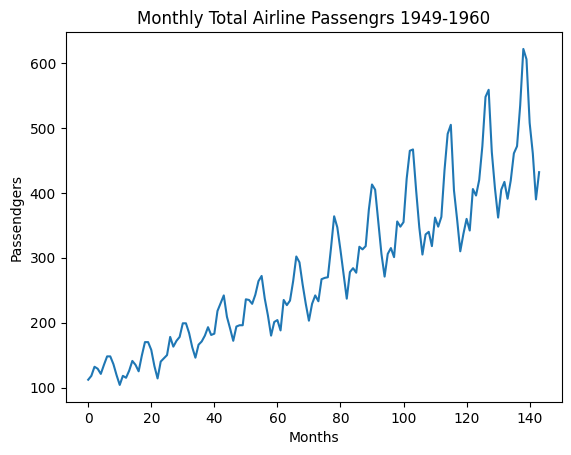

In [2]:

# Load dataset

url ="https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
dataframe = pd.read_csv(url, usecols=[1], engine='python')
plt.plot(dataframe)
plt.xlabel("Months")
plt.ylabel("Passendgers")
plt.title("Monthly Total Airline Passengrs 1949-1960")
plt.show()

### Data Preprocessing 

Before training as LSTM model, we need to preprocess our dat. This involves scaling our data and conveting it into the right shape. 


In [5]:
# Normalize the data sets 
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataframe.values.astype('float32'))

In [6]:
# Split into trqain and test sets 

train_size = int(len(dataset)*0.67) 
train_size = len(dataset)-train_size 
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset),:]

# Create Datset Matrix 

This utility creats a datset matrix. Given data, and choosing a certain time step, it will crate input-output pairs. 

In [7]:
def create_dataset(dataset, look_back=1):
    X, Y =[], [] 
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i+look_back, 0])
    return np.array(X), np.array(Y)

In [8]:
# Reshape into X=t adn Y=t+1, choosing a timestep of 3 

look_back = 3 
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

In [9]:
# REshape input tobe [Samples, time steps, features]

X_train =np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
X_test =np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))

### LSTM Model Building and Training

In [17]:
# Create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

ValueError: Data cardinality is ambiguous:
  x sizes: 44
  y sizes: 1
Make sure all arrays contain the same number of samples.

### Model Evaluation 

In [16]:
# Make predictions
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

# Invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform([y_test])


# Calculate root mean squared error
trainScore = np.sqrt(((trainPredict-y_train)**2).mean())
testScore = np.sqrt(((testPredict-y_test)**2).mean())
print('Train Score: %.2f RMSE' % (trainScore))
print('Test Score: %.2f RMSE' % (testScore))


3/3 [==============================] - 0s 1ms/step


ValueError: Found array with dim 3. None expected <= 2.